In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../src')
from sim import make_dataset
from slda import SLDA
from util import map_labels, show_dataset

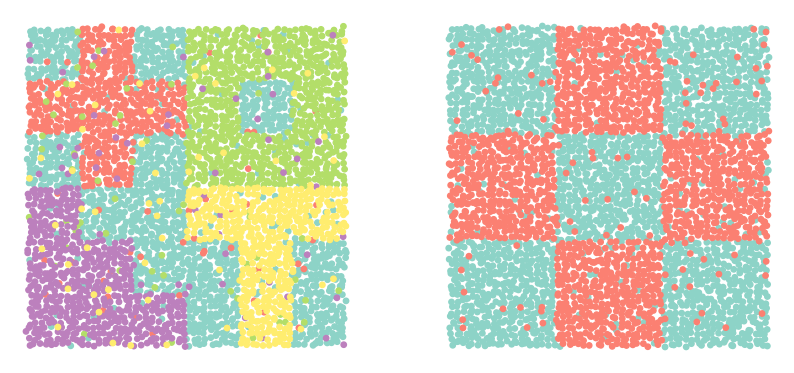

In [24]:
data, labels = make_dataset(('polygons', 'checkers'), (10, 20), wiggle=.25, mix=.1, topic_sep=10)
show_dataset(data, labels)

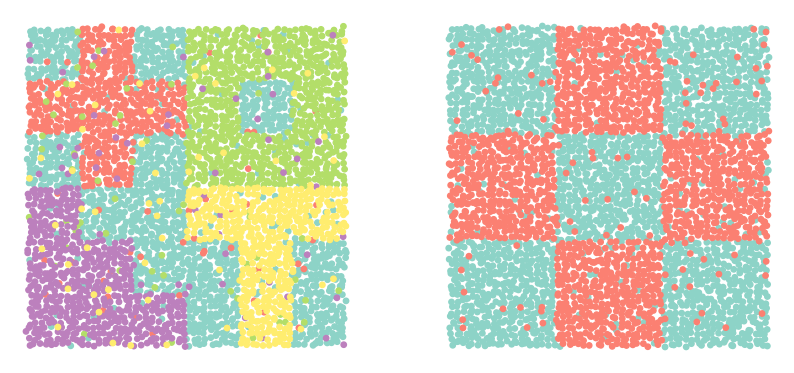

In [25]:
from sklearn.cluster import KMeans

topics = KMeans(5).fit_predict(data[:, 3:])
topics = map_labels(labels, topics)
show_dataset(data, topics)

SLDA: 100%|██████████| 200/200 [01:46<00:00,  1.88it/s]


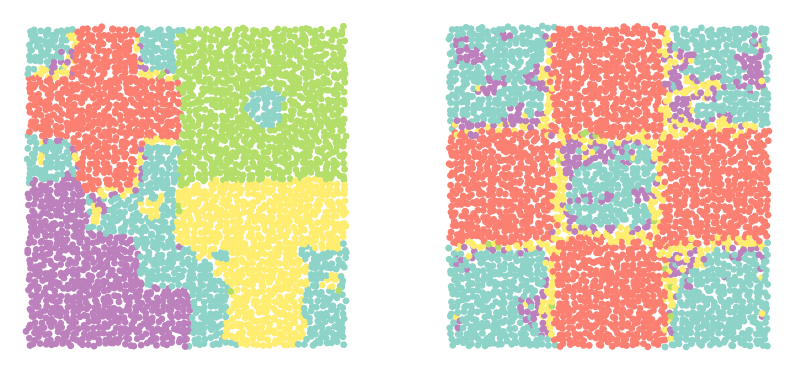

In [29]:
model = SLDA(feature_scale=1., document_scale=2.)
topics = model.fit_predict(data, n_steps=200, burn_in=150)
topics = map_labels(labels, topics)
show_dataset(data, topics)

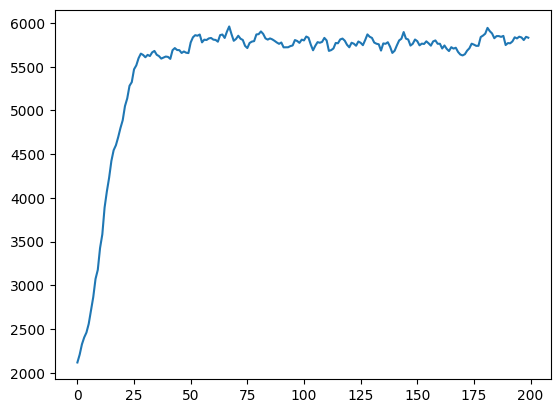

In [30]:
import numpy as np

x = np.arange(len(model.likelihood_log))
plt.plot(x, model.likelihood_log)
plt.show()